#  step-1  Load the data and get an overview

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv("data/data.csv")  

# Check column names and data types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [2]:
# Preview first 5 rows
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:

# Check rows and columns
data.shape

(95662, 16)

 Data Overview Insights

- Dataset has 95,662 rows and 16 columns.
- Columns are a mix of numeric (Amount, Value), categorical (ProductCategory, ChannelId), and string IDs (TransactionId, AccountId).
- There are no missing values.
- Transaction amounts can be positive or negative, indicating credits/debits.
- TransactionStartTime is currently a string; may convert to datetime for analysis.


# step-2 Summary statistics

In [4]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


 Summary Statistics Insights

- All transactions are from CountryCode 256 → single country dataset.
- Transaction amounts (`Amount`) are highly skewed; most transactions are small, but extreme negative and positive values exist (potential outliers).
- `Value` is always positive and highly correlated with `Amount` → may use only one in the model.
- `PricingStrategy` has few distinct values → can be treated as categorical.
- Very few fraudulent transactions (FraudResult = 1) → imbalanced target variable if predicting fraud.


# Step 3: Distribution of numerical features

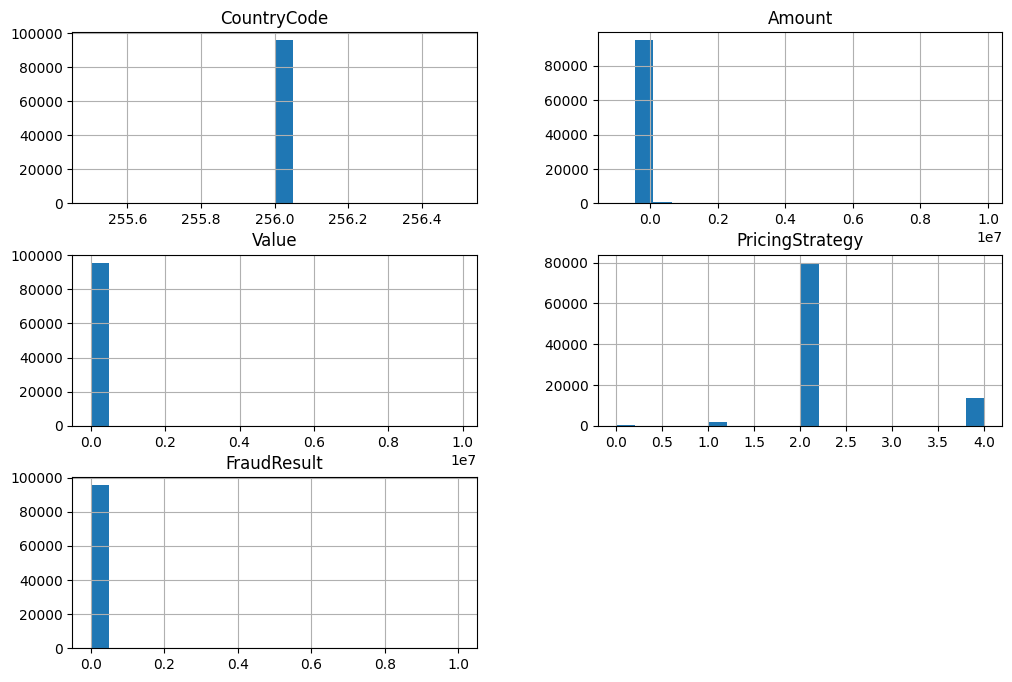

C:\Users\bezis\AppData\Local\Temp\ipykernel_33228\672451371.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\bezis\AppData\Local\Temp\ipykernel_33228\672451371.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], shade=True)


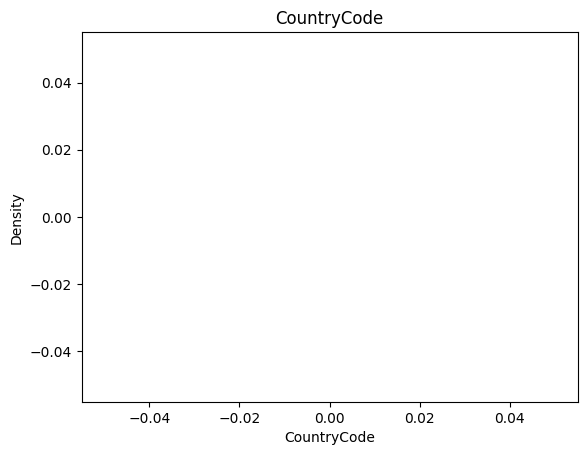

C:\Users\bezis\AppData\Local\Temp\ipykernel_33228\672451371.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


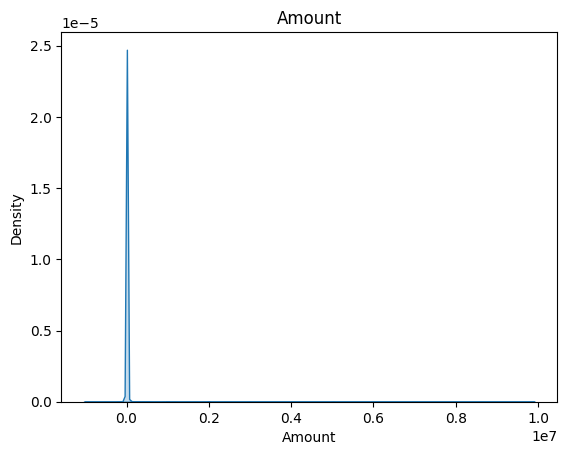

C:\Users\bezis\AppData\Local\Temp\ipykernel_33228\672451371.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


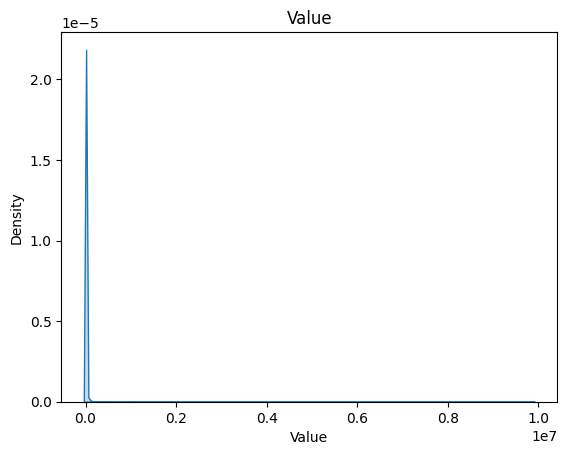

C:\Users\bezis\AppData\Local\Temp\ipykernel_33228\672451371.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


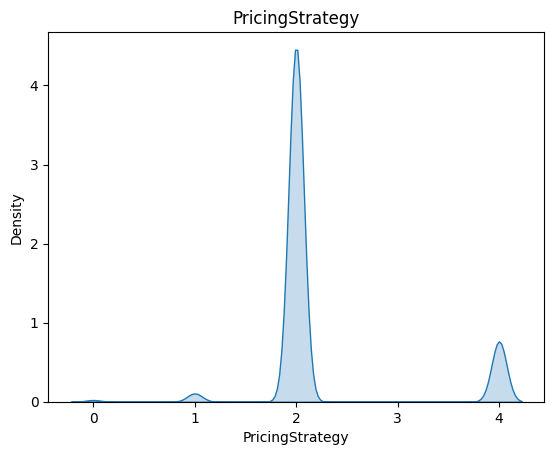

C:\Users\bezis\AppData\Local\Temp\ipykernel_33228\672451371.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


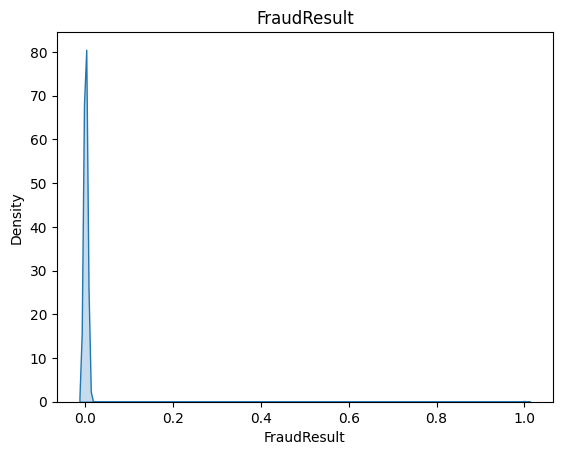

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns



numeric_cols = data.select_dtypes(include='number').columns

# Histograms
data[numeric_cols].hist(figsize=(12,8), bins=20)
plt.show()

# Density plots
for col in numeric_cols:
    sns.kdeplot(data[col], shade=True)
    plt.title(col)
    plt.show()



The numerical features exhibit strong skewness and limited variability.
-  CountryCode contains only a single value and should be removed during modeling. 
- Amount and Value are heavily right-skewed, with many small transactions and a few extremely large outliers.
-  PricingStrategy acts as a categorical variable with clear, discrete modes. 
- FraudResult is extremely imbalanced, with almost all transactions marked as non-fraud. 
- These patterns highlight the need for outlier handling, potential transformations, and strategies for addressing class imbalance in later modeling steps.


# step-4 Distribution of categorical features

---- TransactionId ----
TransactionId
TransactionId_35670     1
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
Name: count, dtype: int64
--------------------------------------------------
---- BatchId ----
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_34879      6
BatchId_86880      6
Name: count, dtype: int64
--------------------------------------------------
---- AccountId ----
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64
----------------

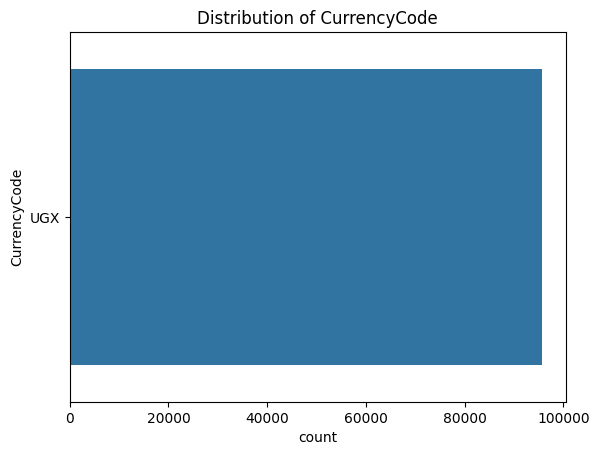

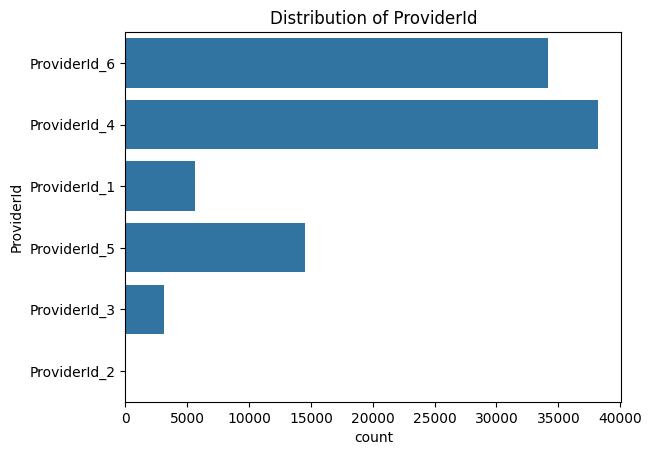

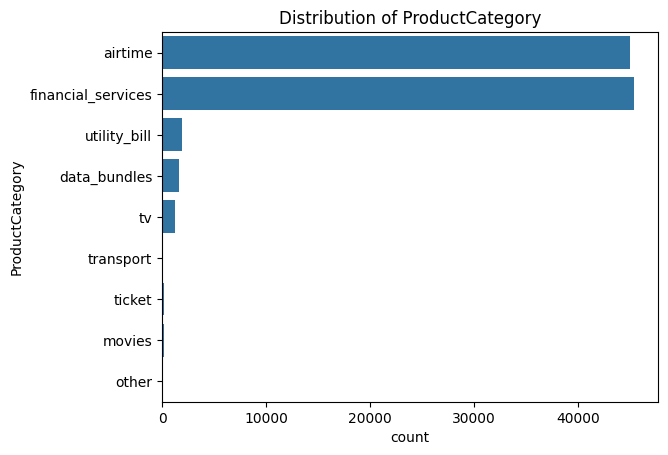

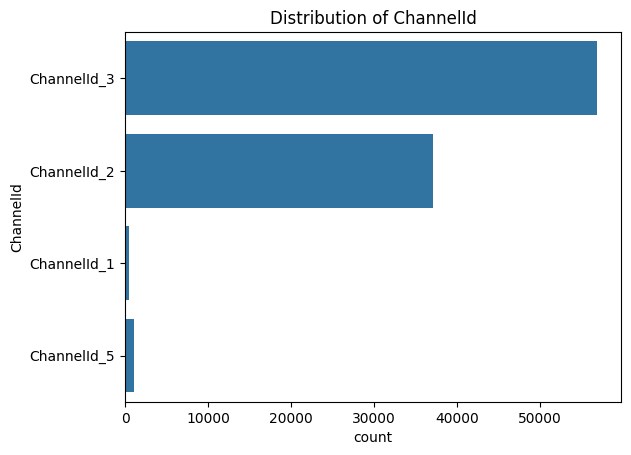

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = data.select_dtypes(include='object').columns

# Show value counts for all (safe)
for col in cat_cols:
    print(f"---- {col} ----")
    print(data[col].value_counts().head(10))  # show TOP 10 only
    print("-"*50)

# Plot only small categorical features
safe_to_plot = []

for col in cat_cols:
    if data[col].nunique() < 20:  # threshold
        safe_to_plot.append(col)

print("Columns that will be plotted:", safe_to_plot)

for col in safe_to_plot:
    sns.countplot(y=col, data=data)
    plt.title(f"Distribution of {col}")
    plt.show()


## Step 4: Insights from Categorical Feature Analysis

- **TransactionId:** Each transaction has a unique ID, indicating no duplicates in the dataset.  
- **BatchId:** Some batch IDs repeat multiple times, showing that transactions are grouped into batches of varying sizes.  
- **CurrencyCode:** Almost all transactions use UGX (Ugandan Shilling), confirming the dataset is focused on Uganda.  
- **CountryCode:** Single country code (256), reinforcing the Uganda-centric nature of the data.  
- **FraudResult:** Highly imbalanced target; the vast majority of transactions are not fraudulent.  
- **ProductCategory:** Mostly `airtime` and `financial_services` (~80,000 transactions combined). Other categories (utility_bill, TV, transport, etc.) are rare.  
- **ChannelId:** Dominated by `ChannelId_3` and `ChannelId_2`, showing transactions occur mostly through these two channels.  
- **ProviderId:** `ProviderId_4` and `ProviderId_6` handle the bulk of transactions, with ProviderId_4 slightly higher.  
- **PricingStrategy:** Strategy `2.0` is the most frequently used, followed by `4.0`.  

**Key Takeaways:**  
- The dataset is **heavily imbalanced** and dominated by a few categories.  
- Some batch IDs repeat, which could affect aggregation-based features.  
- Rare categories may need to be grouped or treated carefully during modeling.  
- Understanding these patterns will help in **feature engineering** and model preparation.


# Step 5: Correlation Analysis

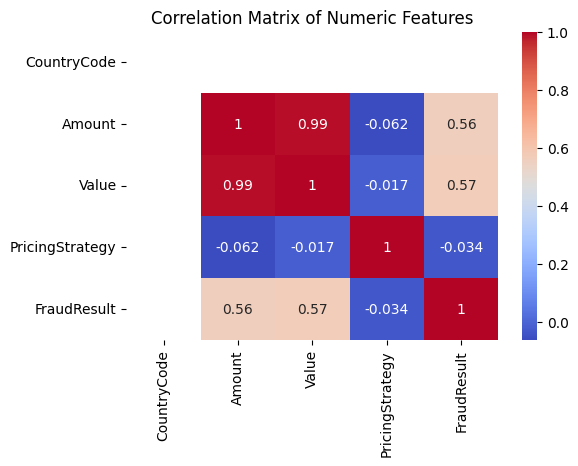

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = data.select_dtypes(include='number').columns

# Compute correlation matrix
corr = data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()


# Correlation Analysis Insights

- **High Multicollinearity:** `Amount` and `Value` are extremely highly correlated (0.99), meaning they essentially measure the same thing. For modeling, keeping both is redundant; one (e.g., `Value`) can be dropped to avoid multicollinearity issues in linear models.
- **Target Correlation:** `FraudResult` has a moderate positive correlation with `Amount` (0.56) and `Value` (0.57). Larger transactions are more likely to be fraudulent, making transaction size an important predictive feature.
- **Other Numeric Features:** Most other numeric columns show little or no correlation with the target or each other, indicating they provide unique information for the model.
- **Modeling Implication:** Correlation analysis helps identify redundant features, prioritize key predictors, and understand which features may carry the most signal for fraud detection.


# step - 6 Identify Missing Values

In [9]:
# Count missing values
missing_values = data.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(data) * 100).sort_values(ascending=False)

# Display
print(missing_percentage)


TransactionId           0.0
BatchId                 0.0
AccountId               0.0
SubscriptionId          0.0
CustomerId              0.0
CurrencyCode            0.0
CountryCode             0.0
ProviderId              0.0
ProductId               0.0
ProductCategory         0.0
ChannelId               0.0
Amount                  0.0
Value                   0.0
TransactionStartTime    0.0
PricingStrategy         0.0
FraudResult             0.0
dtype: float64


# Step 7: Outlier Detection

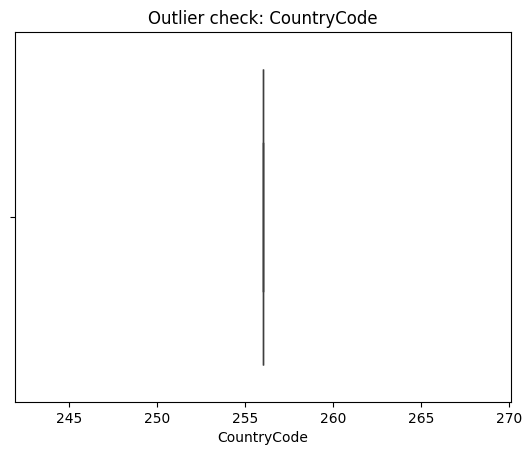

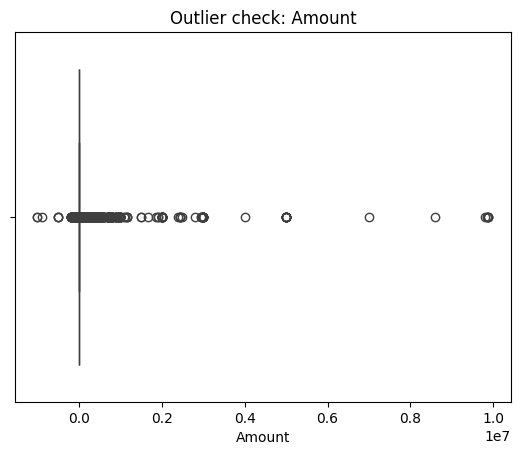

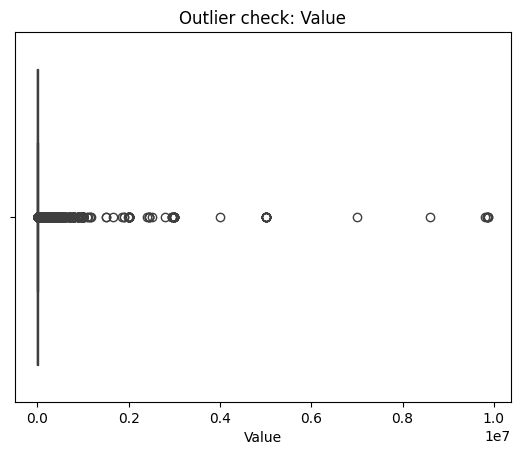

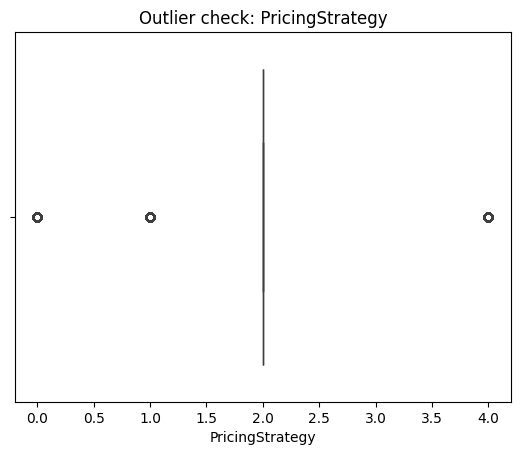

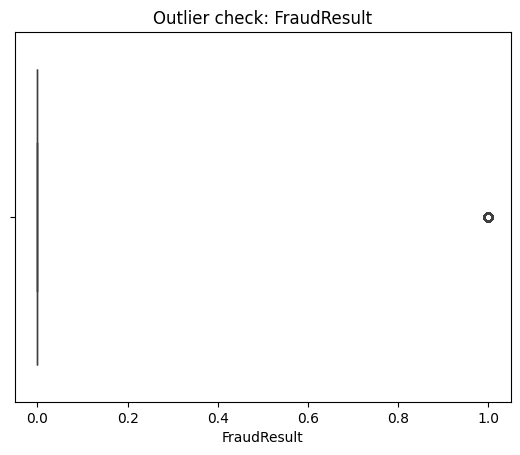

In [10]:
for col in numeric_cols:
    sns.boxplot(x=data[col])
    plt.title(f"Outlier check: {col}")
    plt.show()


## Step 7: Outlier Detection & Summary (Simplified)

- **Geography & Currency:** All transactions are from Uganda (UGX, code 256). These features can be dropped.  
- **Target Imbalance:** Almost all transactions are not fraud (0). Use class weighting or SMOTE.  
- **Financial Features:** Amount and Value are right-skewed with some extreme outliers. Apply `log(Amount + 1)`; drop one of the two due to high correlation (corr = 0.99).  
- **Categorical Features:** Most transactions are in a few categories (PricingStrategy 2.0, airtime, financial_services, ChannelId_3, ProviderId_4). Rare categories can be grouped as "Other".  
- **Transaction & Batch IDs:** TransactionId is unique, BatchId shows repeated counts. TransactionId can be ignored; BatchId may be used for grouping.  



##  Final Summary of Insights from EDA

### 1. Geographic & Currency Features
- **CountryCode** and **CurrencyCode** are almost constant (all transactions in Uganda, UGX, code 256).  
  **Implication:** These features have almost no variance and can be dropped from the model.

### 2. Target Variable (FraudResult)
- The dataset is **highly imbalanced**: majority are `0` (not fraud), very few `1` (fraud).  
  **Implication:** Special handling is needed for modeling (class weights, SMOTE, etc.).

### 3. Financial Features (Amount & Value)
- Both features are **highly right-skewed** with most transactions being small but a few extremely large outliers.  
  **Implication:** Apply a logarithmic transformation (`log(Amount+1)`) to reduce skewness for modeling.

### 4. Categorical Features
- **PricingStrategy:** Dominated by `2.0`; rare strategies are less frequent.  
- **ProductCategory:** Mostly `airtime` and `financial_services`.  
- **ChannelId & ProviderId:** Concentrated in a few categories (ChannelId_3, ProviderId_4).  
  **Implication:** One-hot encode main categories; group rare categories as "Other" to prevent overfitting.

### 5. Transaction & Batch IDs
- **TransactionId** is unique for all rows (each transaction is individual).  
- **BatchId** has repeated counts; some batches contain many transactions.  
  **Implication:** TransactionId can be ignored as a model feature; BatchId may provide grouping info if needed.

### 6. Feature Relationships (Correlation)
- **Amount** and **Value** are almost identical (`corr=0.99`).  
  **Implication:** Drop one (e.g., Value) to avoid redundancy.  
- **FraudResult** has moderate positive correlation with Amount/Value (~0.56–0.57).  
  **Implication:** Larger transactions are slightly more likely to be fraudulent, so transaction size is an important predictor.
